# Chapter 9: Developing Interactive Plots

- Events & Call backs
- Widgets
- Animation

## Events & Callbacks
- Exception Handling
- Key Press & Release Events
- Mouse Button press event for Zoom
- Motion notify and Button press events for tracking co-ordinates
- Pick event for Legend Picking
- Enter/Exit from fig/axes
- Using twin axes for plotting 4 temperature scales

### Exception Handling

In [1]:
import time
class EventLoop:
    def __init__(self):
        self.status = None
        self.event_handlers = {"interrupt": self.handle_interrupt,
                               "DivideByZero": self.handle_DivideByZero}

    def loop(self):
        self.status = "loop"
        strt_time = time.time()
        while self.status == "loop":
            elapsed_time = time.time() - strt_time
            if elapsed_time > 30:
                5 / 0
            
    def start(self):
        try:
            self.loop()
        except KeyboardInterrupt:
            self.handle_event("interrupt")
        except ZeroDivisionError:
            self.handle_event("DivideByZero")
        finally:
            print('Ending the program')
            
    def handle_event(self, event: str):
        self.event_handlers[event]()
        
    def handle_interrupt(self):
        print("Stopping event loop Due to KeyboardInterrupt...")
        
    def handle_DivideByZero(self):
        print("Stopping event loop due to DivideByZero Error...")

el = EventLoop()
el.start()

Stopping event loop Due to KeyboardInterrupt...
Ending the program


In [2]:
# Set up a backend, so that it can be switched to any other interactive backend as required
import matplotlib
matplotlib.use('nbagg')

### Key Press & Release Events

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

plt.switch_backend('Qt5Agg')

def press(event):
    global prst
    prst = time()
    print('press', event.key)
    return prst

def release(event):
    relt = time()
    ht = relt - prst
    print('hold time:',round(ht,2))
    if event.key == 'x':
        visible = lg.get_visible()
        lg.set_visible(not visible)
        tm = 'hold time: ' + str(round(ht, 2))
        t = plt.text(np.random.randint(1,4), np.random.randint(-3,4), tm)
        plt.setp(t, color='r', size=15, weight='bold')
        ax.add_artist(t)
        fig.canvas.draw()

x = np.arange(1, 2.6, 0.1) 
y = 3*np.sin(2 * np.pi * x)
y1 = 3*np.cos(2 * np.pi * x) 

fig, ax = plt.subplots()

ax.plot(x ,y, 'go-', label='sin')
ax.plot(x, y1, 'bd-', label='cos')

lg = ax.legend(loc='upper center', fontsize=15)
ax.set_title('Press a key', size=25)

fig.canvas.mpl_connect('key_press_event', press)
fig.canvas.mpl_connect('key_release_event', release)

plt.show();

press w
hold time: 0.24
press u
hold time: 0.23
press x
hold time: 0.26
press g
hold time: 0.19
press g
hold time: 0.19
press l
hold time: 0.28
press l
hold time: 0.16
press x
hold time: 0.24
press q


### Mouse Button Press event for Zooming

In [4]:
import matplotlib.pyplot as plt
import numpy as np

figmain, axmain = plt.subplots()
figzoom, axzoom = plt.subplots()

axmain.set(xlim=(-5, 5), ylim=(-75, 175), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(-2, 2), ylim=(-8, 8), autoscale_on=False,
           title='Zoom window')

x = np.arange(-5, 5, 0.1)
y = x ** 3

axmain.plot(x, y, 'g-d')
axzoom.plot(x, y, 'b-.o')

def onbuttonpress(event):
    if event.button == 1:        # left = 1, scroll=2, right=3
        x, y = event.xdata, event.ydata
        axzoom.set_xlim(x - 1, x + 1)
        axzoom.set_ylim(y - 10, y + 10)
        figzoom.canvas.draw()

figmain.canvas.mpl_connect('button_press_event', onbuttonpress)

plt.show();

### Motion Notify and Mouse Button Press events for tracking Co-ordinates

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

#plt.switch_backend('Qt5Agg')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

str_time = time()

def on_move(event):
    if event.inaxes:
        print('onmove data coords %.2f %.2f' % (event.xdata, event.ydata))
    elapsed_time = time() - str_time
    print('elapsed time', elapsed_time)
    if elapsed_time > 10:
        print('Closing onmove event after 15 sec')
        plt.disconnect(binding_id)

def on_click(event):
    if event.inaxes is not None:
        if event.button == 1:
            print('left click data coords %.2f %.2f' % (event.xdata, event.ydata))
            ax.text(event.xdata, event.ydata, 'left click here', weight='bold', color='m')
        elif event.button == 2:
            print('scroll click data coords %.2f %.2f' % (event.xdata, event.ydata))
            ax.text(event.xdata, event.ydata, 'scroll click here', weight='bold', color='m')
        elif event.button == 3:
            print('right click data coords %.2f %.2f' % (event.xdata, event.ydata))
            ax.text(event.xdata, event.ydata, 'right click here', weight='bold', color='m')
        fig.canvas.draw()
binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show();

elapsed time 6.061332702636719
elapsed time 6.067412614822388
elapsed time 6.075741767883301
elapsed time 6.077401876449585
elapsed time 6.077401876449585
elapsed time 6.093057870864868
elapsed time 6.1401207447052
elapsed time 6.155543804168701
elapsed time 6.155543804168701
elapsed time 6.171165943145752
elapsed time 6.171165943145752
elapsed time 6.186786890029907
elapsed time 6.202601432800293
elapsed time 6.249474048614502
elapsed time 6.263864278793335
elapsed time 6.270843267440796
elapsed time 6.276824712753296
elapsed time 6.284804344177246
elapsed time 6.2933361530303955
elapsed time 6.301384449005127
elapsed time 6.30855655670166
elapsed time 6.3102335929870605
elapsed time 6.3102335929870605
elapsed time 6.337418079376221
elapsed time 6.512887001037598
elapsed time 6.520864725112915
elapsed time 6.52684760093689
elapsed time 6.534826993942261
elapsed time 6.543054819107056
onmove data coords -0.04 0.84
elapsed time 6.551345109939575
onmove data coords -0.03 0.84
elapsed tim

### Pick Event for Legend Picking

<IPython.core.display.Javascript object>


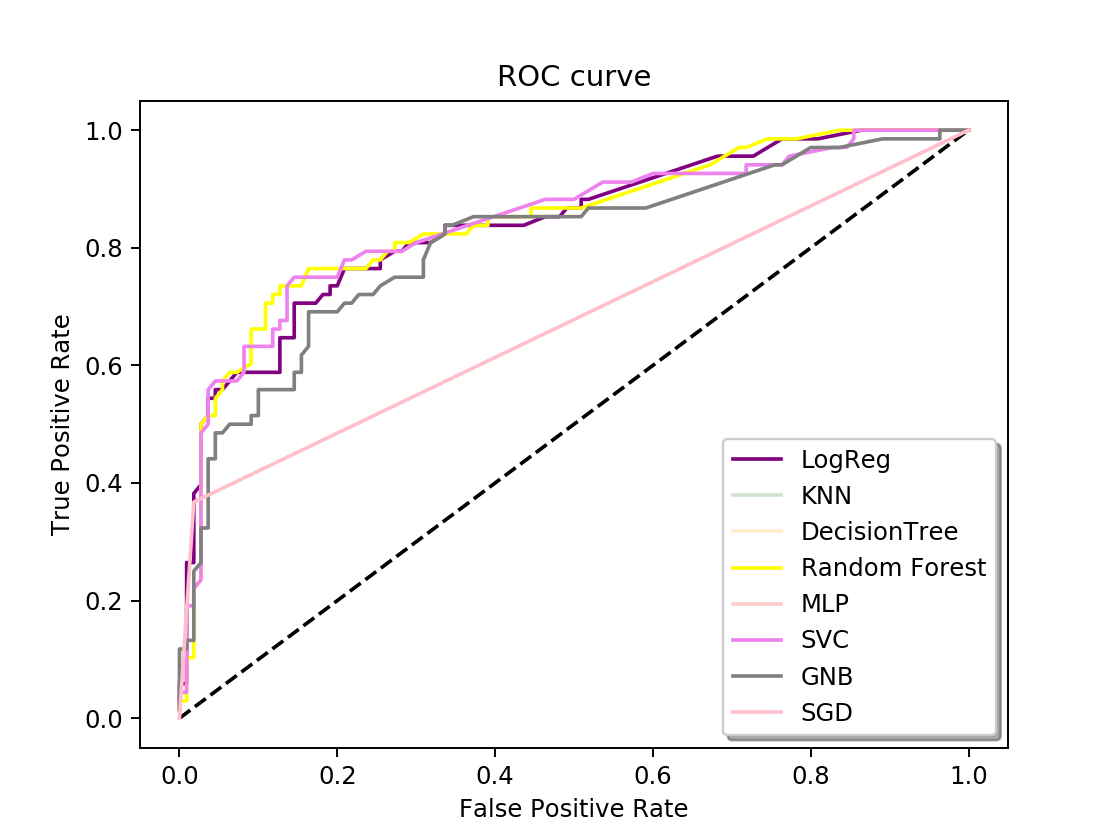

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.switch_backend('nbAgg')

fpr_logreg = pd.read_excel('ROC_Curves.xlsx', 'fpr_logreg')
tpr_logreg = pd.read_excel('ROC_Curves.xlsx', 'tpr_logreg')
fpr_KNN = pd.read_excel('ROC_Curves.xlsx', 'fpr_KNN')
tpr_KNN = pd.read_excel('ROC_Curves.xlsx', 'tpr_KNN')
fpr_MLP = pd.read_excel('ROC_Curves.xlsx', 'fpr_MLP')
tpr_MLP = pd.read_excel('ROC_Curves.xlsx', 'tpr_MLP')
fpr_SGD = pd.read_excel('ROC_Curves.xlsx', 'fpr_SGD')
tpr_SGD = pd.read_excel('ROC_Curves.xlsx', 'tpr_SGD')
fpr_GNB = pd.read_excel('ROC_Curves.xlsx', 'fpr_GNB')
tpr_GNB = pd.read_excel('ROC_Curves.xlsx', 'tpr_GNB')
fpr_svc = pd.read_excel('ROC_Curves.xlsx', 'fpr_svc')
tpr_svc = pd.read_excel('ROC_Curves.xlsx', 'tpr_svc')
fpr_RF = pd.read_excel('ROC_Curves.xlsx', 'fpr_RF')
tpr_RF = pd.read_excel('ROC_Curves.xlsx', 'tpr_RF')
fpr_DT = pd.read_excel('ROC_Curves.xlsx', 'fpr_DT')
tpr_DT = pd.read_excel('ROC_Curves.xlsx', 'tpr_DT')

fig = plt.figure()      # Changed from (10,8) to (8,8)
plt.plot([0, 1], [0, 1], 'k--')
l1, = plt.plot(fpr_logreg, tpr_logreg, label='LogReg',color='purple')
l2, = plt.plot(fpr_KNN, tpr_KNN, label='KNN',color='green')
l3, = plt.plot(fpr_DT, tpr_DT, label='DecisionTree', color='orange')
l4, = plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='yellow')
l5, = plt.plot(fpr_MLP, tpr_MLP, label='MLP',color='red')
l6, = plt.plot(fpr_svc, tpr_svc, label='SVC',color='violet')
l7, = plt.plot(fpr_GNB, tpr_GNB, label='GNB',color='grey')
l8, = plt.plot(fpr_SGD, tpr_SGD, label='SGD', color='pink')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
lgd = plt.legend(loc='lower right', fancybox=True, shadow=True)

# Create a dictionary to map plot lines to legend labels
pltlines = [l1, l2, l3, l4, l5, l6, l7, l8]
leg_ln_map = dict()
for leg_line, plot_line in zip(lgd.get_lines(), pltlines):
    leg_line.set_picker(5)  
    leg_ln_map[leg_line] = plot_line

def onpick(event):
    # on the pick event, find the plot line corresponding to the legend proxy line, and toggle the visibility
    leg_line = event.artist
    plot_line = leg_ln_map[leg_line]
    vis = not plot_line.get_visible()
    plot_line.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines have been toggled
    if vis:
        leg_line.set_alpha(1.0)
    else:
        leg_line.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show();

#### Enter/Exit from Figure/Axes

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.switch_backend('Qt5Agg')

fig = plt.figure()
fig.suptitle('mouse hover over figure or axes to trigger events')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

x = np.arange(1, 2.0, 0.1) 
y = np.sin(2 * np.pi * x)
y1 = np.cos(2 * np.pi * x)
ax1.plot(x,y, color='g')
ax2.plot(x, y1, color='b')

def figure_enter(event):
    print('figure_enter', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('grey')
    event.canvas.draw()

def figure_exit(event):
    print('figure_exit', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('red')
    event.canvas.draw()
    
def axes_enter(event):
    print('axes_enter', event.inaxes)
    event.inaxes.patch.set_facecolor('white')
    event.inaxes.get_lines()[0].set_visible(True)
    event.canvas.draw()

def axes_exit(event):
    print('axes_exit', event.inaxes)
    event.inaxes.patch.set_facecolor('orange')
    event.inaxes.get_lines()[0].set_visible(False)
    event.canvas.draw()

fig.canvas.mpl_connect('figure_enter_event', figure_enter)
fig.canvas.mpl_connect('figure_leave_event', figure_exit)
fig.canvas.mpl_connect('axes_enter_event', axes_enter)
fig.canvas.mpl_connect('axes_leave_event', axes_exit)

plt.show();

figure_exit Figure(640x478)
figure_enter Figure(640x478)
axes_enter AxesSubplot(0.125,0.53;0.775x0.35)
axes_exit AxesSubplot(0.125,0.53;0.775x0.35)
figure_exit Figure(640x478)
figure_enter Figure(640x478)
axes_enter AxesSubplot(0.125,0.53;0.775x0.35)
axes_exit AxesSubplot(0.125,0.53;0.775x0.35)
axes_enter AxesSubplot(0.125,0.11;0.775x0.35)
axes_exit AxesSubplot(0.125,0.11;0.775x0.35)
axes_enter AxesSubplot(0.125,0.53;0.775x0.35)
axes_exit AxesSubplot(0.125,0.53;0.775x0.35)
figure_exit Figure(640x478)
figure_enter Figure(640x478)
axes_enter AxesSubplot(0.125,0.53;0.775x0.35)
axes_exit AxesSubplot(0.125,0.53;0.775x0.35)
axes_enter AxesSubplot(0.125,0.11;0.775x0.35)
axes_exit AxesSubplot(0.125,0.11;0.775x0.35)
axes_enter AxesSubplot(0.125,0.53;0.775x0.35)
axes_exit AxesSubplot(0.125,0.53;0.775x0.35)
axes_enter AxesSubplot(0.125,0.11;0.775x0.35)
axes_exit AxesSubplot(0.125,0.11;0.775x0.35)
figure_exit Figure(640x478)
figure_enter Figure(640x478)
axes_enter AxesSubplot(0.125,0.53;0.775x0.35

#### Using twin axes for plotting 4 temperature scales

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19681211)

def c2f(temp):
    return (9. / 5.) * temp + 32
def c2k(temp):
    return temp + 273.15
def c2r(temp):
    return (9. / 5.) * temp + 427.9

def refresh_scales(ax_c):
    """
    Update all parasite axes corresponding to main axis current limits
    """
    y1, y2 = ax_c.get_ylim()
    
    ax_f.set_ylim(c2f(y1), c2f(y2))
    #ax_f.figure.canvas.draw()              #may have to uncomment, if refresh does not happen
    
    ax_k.set_ylim(c2k(y1), c2k(y2))
    #ax_k.figure.canvas.draw()
    
    ax_r.set_ylim(c2r(y1), c2r(y2))
    #ax_r.figure.canvas.draw()

fig, ax_c = plt.subplots()
ax_f = ax_c.twinx()
ax_k = ax_c.twinx()
ax_r = ax_c.twinx()

ax_k.spines["right"].set_position(("axes", 1.18))  #Changed 1.15 to 1.18 for 3.0
ax_r.spines["right"].set_position(("axes", 1.35))  #Changed 1.30 to 1.35 for 3.0

# automatically update all the scales, when celsius limits change
ax_c.callbacks.connect("ylim_changed", refresh_scales)
ax_c.plot(np.random.uniform(low=-40., high=40., size=(30,)))
ax_c.set_xlim(0, 30)

ax_c.set_title('Temparature on Four different Scales')
ax_c.set_ylabel('Celsius', color='g')
ax_f.set_ylabel('Fahrenheit')
ax_k.set_ylabel('Kelvin')
ax_r.set_ylabel('Rankine')

ax_f.yaxis.label.set_color('b')
ax_k.yaxis.label.set_color('r')
ax_r.yaxis.label.set_color('m')

ax_c.tick_params(axis='y', colors='g')
ax_f.tick_params(axis='y', colors='b')
ax_k.tick_params(axis='y', colors='r')
ax_r.tick_params(axis='y', colors='m')

ax_c.spines["left"].set_edgecolor('g')
ax_f.spines["right"].set_edgecolor('b')
ax_k.spines["right"].set_edgecolor('r')
ax_r.spines["right"].set_edgecolor('m')

plt.tight_layout()    # Added for 3.0
plt.show();

## Widgets
- Cursor
- Buttons
- Check Buttons
- Radio Buttons
- TextBox


### Cursor

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor

#plt.switch_backend('Qt5Agg')

x = np.arange(-5, 5, 0.1)
y = x ** 2

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='skyblue')

ax.plot(x, y, 'o')

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=5)

plt.show();

### Button

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Button

#plt.switch_backend('Qt5Agg')

class Cluster(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(species)
        index = iris['species'] == species[i]
        axs.clear()
        axs.scatter(x[index], y[index], s=50, marker='o')
        axs.set_title(species[i], size=25, color='r')
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(species)
        index = iris['species'] == species[i]
        axs.clear()
        axs.scatter(x[index], y[index], s=50, marker='o')
        axs.set_title(species[i], size=25, color='r')
        plt.draw()

callback = Cluster()
iris = pd.read_csv('iris_dataset.csv', delimiter=',')
species = ['setosa', 'versicolor', 'virginica']

x,y = iris['petal_length'],  iris['petal_width']
index = iris['species'] == species[callback.ind]
fig, axs = plt.subplots()
axs.scatter(x[index], y[index], s=50, marker='o')
axs.set_title(species[callback.ind], size=25, color='r')

axprev = plt.axes([0.7, 0.005, 0.1, 0.05])
axnext = plt.axes([0.81, 0.005, 0.1, 0.05])

bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show();

### Check Boxes

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import CheckButtons

#plt.switch_backend('Qt5Agg')

fpr_logreg = pd.read_excel('ROC_Curves.xlsx', 'fpr_logreg')
tpr_logreg = pd.read_excel('ROC_Curves.xlsx', 'tpr_logreg')
fpr_KNN = pd.read_excel('ROC_Curves.xlsx', 'fpr_KNN')
tpr_KNN = pd.read_excel('ROC_Curves.xlsx', 'tpr_KNN')
fpr_MLP = pd.read_excel('ROC_Curves.xlsx', 'fpr_MLP')
tpr_MLP = pd.read_excel('ROC_Curves.xlsx', 'tpr_MLP')
fpr_SGD = pd.read_excel('ROC_Curves.xlsx', 'fpr_SGD')
tpr_SGD = pd.read_excel('ROC_Curves.xlsx', 'tpr_SGD')
fpr_GNB = pd.read_excel('ROC_Curves.xlsx', 'fpr_GNB')
tpr_GNB = pd.read_excel('ROC_Curves.xlsx', 'tpr_GNB')
fpr_svc = pd.read_excel('ROC_Curves.xlsx', 'fpr_svc')
tpr_svc = pd.read_excel('ROC_Curves.xlsx', 'tpr_svc')
fpr_RF = pd.read_excel('ROC_Curves.xlsx', 'fpr_RF')
tpr_RF = pd.read_excel('ROC_Curves.xlsx', 'tpr_RF')
fpr_DT = pd.read_excel('ROC_Curves.xlsx', 'fpr_DT')
tpr_DT = pd.read_excel('ROC_Curves.xlsx', 'tpr_DT')

fig = plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
l1, = plt.plot(fpr_logreg, tpr_logreg, label='LogReg',color='purple')
l2, = plt.plot(fpr_KNN, tpr_KNN, label='KNN',color='green')
l3, = plt.plot(fpr_DT, tpr_DT, label='DecisionTree', color='orange')
l4, = plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='yellow')
l5, = plt.plot(fpr_MLP, tpr_MLP, label='MLP',color='red')
l6, = plt.plot(fpr_svc, tpr_svc, label='SVC',color='violet')
l7, = plt.plot(fpr_GNB, tpr_GNB, label='GNB',color='grey')
l8, = plt.plot(fpr_SGD, tpr_SGD, label='SGD', color='pink')
plt.xlabel('False Positive Rate', size=25, color='m')
plt.ylabel('True Positive Rate', size=25, color='m')
plt.title('ROC curve', size=25, color='b')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.subplots_adjust(left=0.35)
plt.legend()                    # added for 3.0

lines = [l1, l2, l3, l4, l5, l6, l7, l8]

rax = plt.axes([0.05, 0.27, 0.15, 0.5])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)

plt.show();

### Radio Buttons

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons

#plt.switch_backend('Qt5Agg')

# Data taken from https://data.worldbank.org/country
Year = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
China_GDP = [3.552, 4.598, 5.11, 6.101, 7.573, 8.561, 9.607, 10.482, 11.065, 11.191]
US_GDP = [14.478, 14.719, 14.419, 14.964, 15.518, 16.155, 16.692, 17.428, 18.121, 18.624]
UK_GDP = [3.074, 2.891, 2.383, 2.441, 2.62, 2.662, 2.74, 3.023, 2.886, 2.651]

fig, axs = plt.subplots(figsize=(14,6))     # Added figsize=(14,6) for 3.0 changes
plt.subplots_adjust(left=0.18)              # Changed from 0.3 to 0.18 for 3.0 changes
line, = axs.plot(Year, US_GDP, lw=5, color='g', ls='-.')
axs.set_ylim(1,20)
axs.set_title('GDP(in trillion $)')
axs.set_xlabel('Year')

rax = plt.axes([0.05, 0.5, 0.08, 0.25], facecolor='skyblue')   # changed 0.15 to 0.08 for 3.0
radio = RadioButtons(rax, ('USA', 'China', 'UK'))

def country(label):
    countrydict = {'USA': [US_GDP, 'g', '-.'], 'China': [China_GDP, 'b', '--'], 
                   'UK': [UK_GDP, 'm', '-']}
    ydata, color, ls = countrydict[label]
    line.set_ydata(ydata)
    line.set_color(color)
    line.set_linestyle(ls)
    plt.draw()

radio.on_clicked(country)

plt.show();

### Text Box for free form expressions

In [14]:
# Text Box Input, by inputting different formulae using t, you can see different graphs display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
x = np.arange(-5.0, 5.0, 0.01)
y = x ** 2
initial_text = "x ** 2"
l, = plt.plot(x, y, lw=2)

def submit(text):
    ydata = eval(text)
    l.set_ydata(ydata)
    ax.set_ylim(np.min(ydata), np.max(ydata))
    title = 'y = ' + text
    ax.set_title(title)
    plt.draw()
    
def change(text):
    ydata = eval(text)
    l.set_ydata(ydata)
    ax.set_ylim(np.min(ydata), np.max(ydata))
    plt.draw()

axbox = plt.axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, 'Evaluate', initial=initial_text)
text_box.on_submit(submit)
#text_box.on_text_change(change)

plt.show();

## Animation
- Animated Sigmoid
- Saving Animation to mp4 file
- Exponentially Decaying tan function
- Animated bubble plot
- Animation of multiple line plots
- Animation of images


### Animated Sigmoid & Saving animation to .mp4 format

<IPython.core.display.Javascript object>


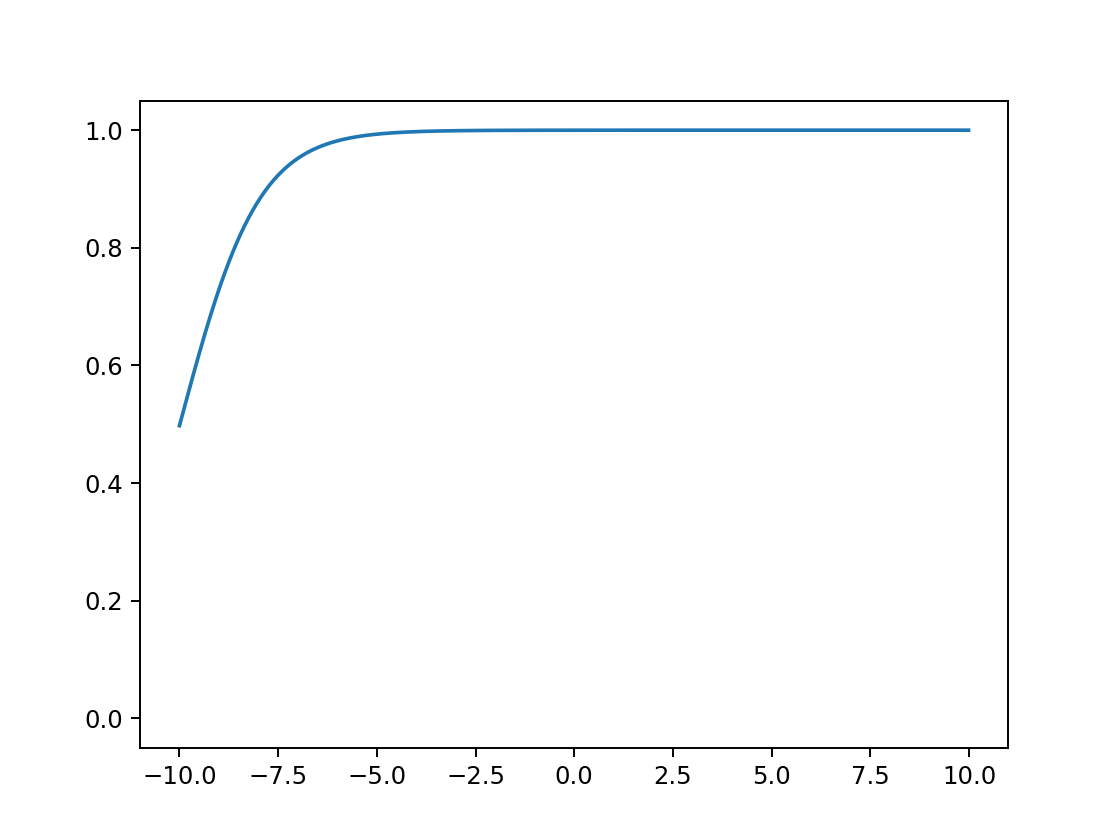

In [17]:
%matplotlib nbagg    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

x = np.arange(-10, 10, 0.01)
y = 1 / (1 + np.exp(-x))
line, = ax.plot(x, y)

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line

def animate(i):
    line.set_ydata(1 / (1 + np.exp(-(x+i/100))))  # update the data.
    return line,

ani = FuncAnimation(fig, animate, 1000, init_func=init, blit=True, interval=2, save_count=50, 
                              repeat=False, repeat_delay=1000)

# To save the animation, use e.g.
ani.save("sigmoid.mp4")

plt.show();

### Exponentially Decaying Tan Function

<IPython.core.display.Javascript object>


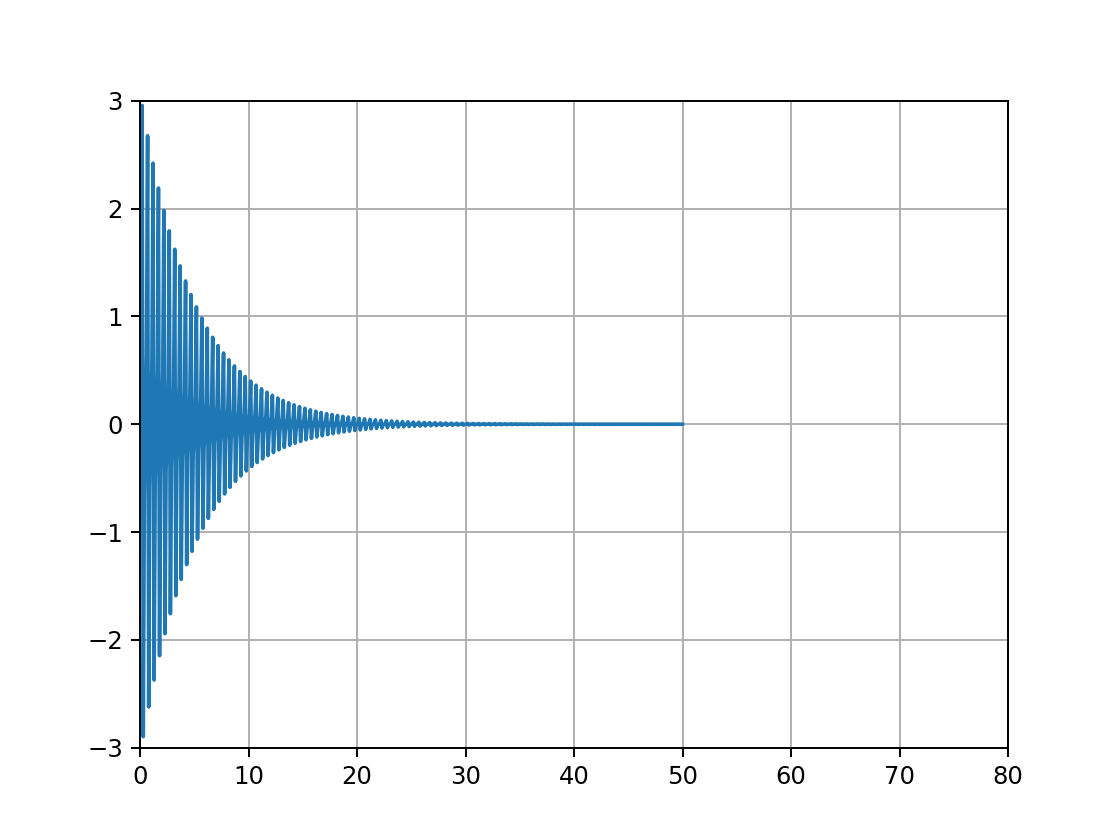

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def frame_gen(x=0):
    while x < 50:
        x += 0.1
        yield x, np.tan(2*np.pi*x) * np.exp(-x/5.)

fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set_ylim(-3.0, 3.0)
ax.set_xlim(0, 10)
ax.grid()
xdata, ydata = [], []

def animate(data):
    x, y = data
    xdata.append(x)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if x >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, animate, frame_gen, blit=True, interval=2, repeat=False)

from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=25, metadata=dict(title='expdecay',artist='line'), bitrate=1800)
ani.save("Exp_decay.mp4", writer=writer)

plt.show();

### Animated Bubble Plot

<IPython.core.display.Javascript object>


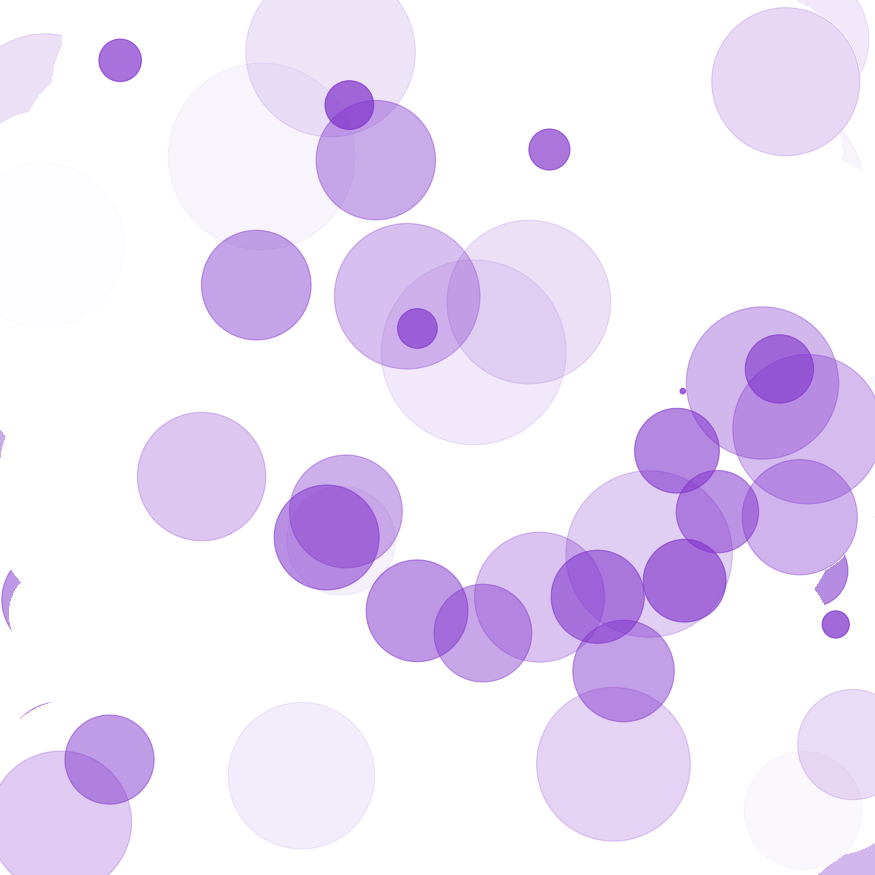

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
np.random.seed(19681211)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, 
                  facecolors=rain_drops['color'])
    
def animate(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops
    #print(frame_number)
    #print(current_index)
    #print('I am inside update')

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0.5, 0.2, 0.8, 0.75)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_facecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])

# Construct the animation, using the animate function as the animation director.
animation = FuncAnimation(fig, animate, interval=2)
plt.show();

### Animated Line Graphs

<IPython.core.display.Javascript object>


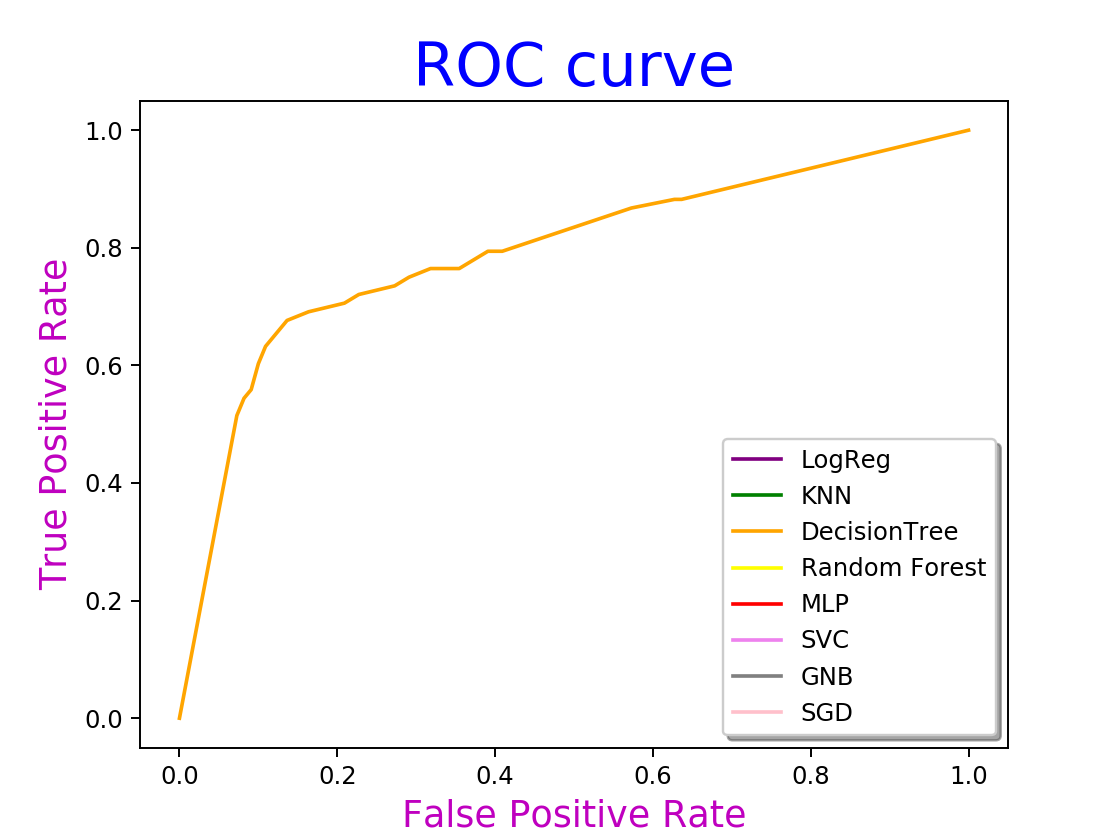

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import ArtistAnimation

#plt.switch_backend('nbAgg')

fpr_logreg = pd.read_excel('ROC_Curves.xlsx', 'fpr_logreg')
tpr_logreg = pd.read_excel('ROC_Curves.xlsx', 'tpr_logreg')
fpr_KNN = pd.read_excel('ROC_Curves.xlsx', 'fpr_KNN')
tpr_KNN = pd.read_excel('ROC_Curves.xlsx', 'tpr_KNN')
fpr_MLP = pd.read_excel('ROC_Curves.xlsx', 'fpr_MLP')
tpr_MLP = pd.read_excel('ROC_Curves.xlsx', 'tpr_MLP')
fpr_SGD = pd.read_excel('ROC_Curves.xlsx', 'fpr_SGD')
tpr_SGD = pd.read_excel('ROC_Curves.xlsx', 'tpr_SGD')
fpr_GNB = pd.read_excel('ROC_Curves.xlsx', 'fpr_GNB')
tpr_GNB = pd.read_excel('ROC_Curves.xlsx', 'tpr_GNB')
fpr_svc = pd.read_excel('ROC_Curves.xlsx', 'fpr_svc')
tpr_svc = pd.read_excel('ROC_Curves.xlsx', 'tpr_svc')
fpr_RF = pd.read_excel('ROC_Curves.xlsx', 'fpr_RF')
tpr_RF = pd.read_excel('ROC_Curves.xlsx', 'tpr_RF')
fpr_DT = pd.read_excel('ROC_Curves.xlsx', 'fpr_DT')
tpr_DT = pd.read_excel('ROC_Curves.xlsx', 'tpr_DT')

fig = plt.figure()
l0 = plt.plot([0, 1], [0, 1], 'k--', animated=True)
l1 = plt.plot(fpr_logreg, tpr_logreg, label='LogReg', color='purple', animated=True)
l2 = plt.plot(fpr_KNN, tpr_KNN, label='KNN', color='green', animated=True)
l3 = plt.plot(fpr_DT, tpr_DT, label='DecisionTree', color='orange', animated=True)
l4 = plt.plot(fpr_RF, tpr_RF, label='Random Forest', color='yellow', animated=True)
l5 = plt.plot(fpr_MLP, tpr_MLP, label='MLP', color='red', animated=True)
l6 = plt.plot(fpr_svc, tpr_svc, label='SVC', color='violet', animated=True)
l7 = plt.plot(fpr_GNB, tpr_GNB, label='GNB', color='grey', animated=True)
l8 = plt.plot(fpr_SGD, tpr_SGD, label='SGD', color='pink', animated=True)

lines = [l0, l1, l2, l3, l4, l5, l6, l7, l8]

plt.xlabel('False Positive Rate', size=15, color='m')
plt.ylabel('True Positive Rate', size=15, color='m')
plt.title('ROC curve', size=25, color='b')
plt.legend(loc='lower right', fancybox=True, shadow=True)
    
ani = ArtistAnimation(fig, lines, blit=True, interval=1000, repeat=True, repeat_delay=2500)

ani.save("ROC_Curves.mp4")
plt.show();

### Animated Images

<IPython.core.display.Javascript object>


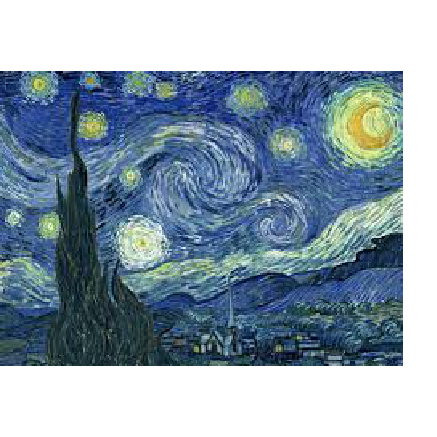

In [24]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread
from matplotlib.animation import ArtistAnimation

fig = plt.figure(figsize=(5,5), dpi=50)
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xticks([])
ax.set_yticks([])

images = []

image1 = imshow(imread("monet.png"), animated=True)
images.append([image1])

image2 = imshow(imread("louvre_small.png"), animated=True)
images.append([image2])

image3 = imshow(imread("vangogh.png"), animated=True)
images.append([image3])

image4 = imshow(imread("persepalis.png"), animated=True)
images.append([image4])

ani = ArtistAnimation(fig, images, interval=2500, blit=False, repeat=True,
                                repeat_delay=1000)
ani.save("images.mp4")
plt.show();